In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import tree
import warnings
warnings.filterwarnings(action = 'ignore')

In [3]:
company_data = pd.read_csv('Company_Data.csv')
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
company_data.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


Exploratory Data Analysis:-
    
Checking missing values

In [5]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
company_data[company_data.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


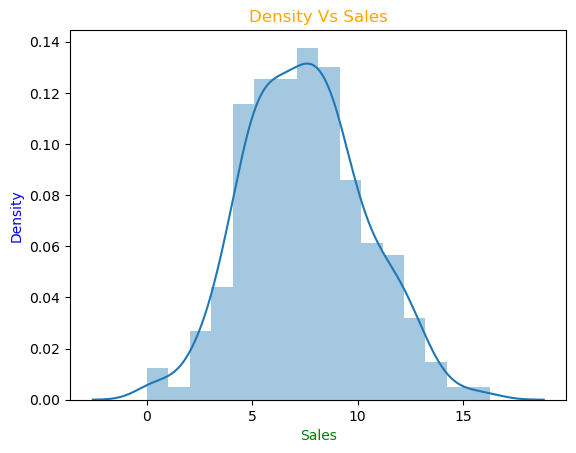

In [7]:
sns.distplot(company_data['Sales'])
plt.xlabel('Sales',color = 'green')
plt.ylabel('Density',color = 'blue')
plt.title('Density Vs Sales', color = 'orange')
plt.show()

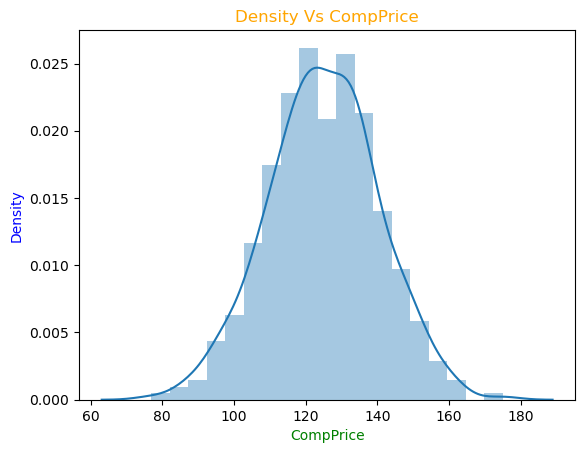

In [8]:
sns.distplot(company_data['CompPrice'])
plt.xlabel('CompPrice',color = 'green')
plt.ylabel('Density',color = 'blue')
plt.title('Density Vs CompPrice', color = 'orange')
plt.show()

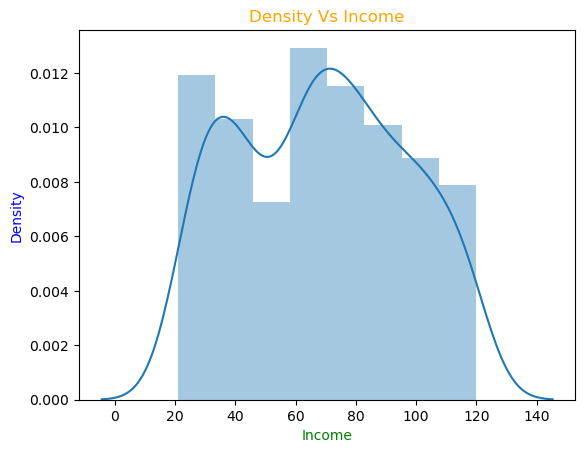

In [9]:
sns.distplot(company_data['Income'])
plt.xlabel('Income',color = 'green')
plt.ylabel('Density',color = 'blue')
plt.title('Density Vs Income', color = 'orange')
plt.show()

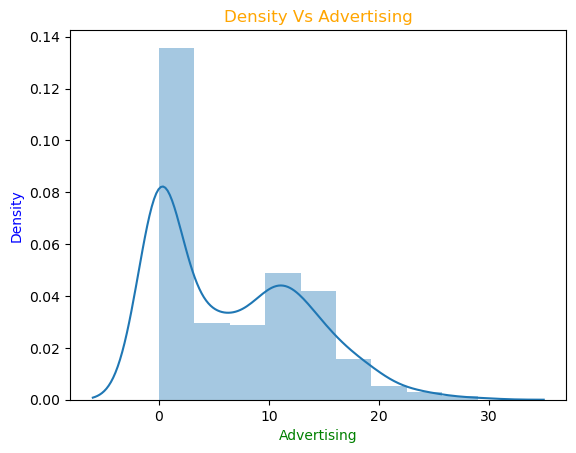

In [10]:
sns.distplot(company_data['Advertising'])
plt.xlabel('Advertising',color = 'green')
plt.ylabel('Density',color = 'blue')
plt.title('Density Vs Advertising', color = 'orange')
plt.show()

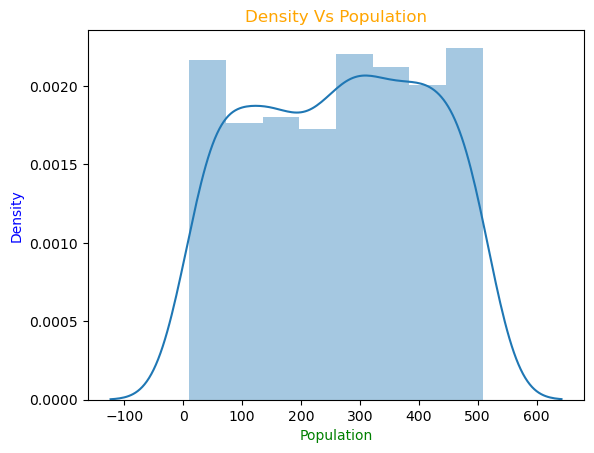

In [11]:
sns.distplot(company_data['Population'])
plt.xlabel('Population',color = 'green')
plt.ylabel('Density',color = 'blue')
plt.title('Density Vs Population', color = 'orange')
plt.show()

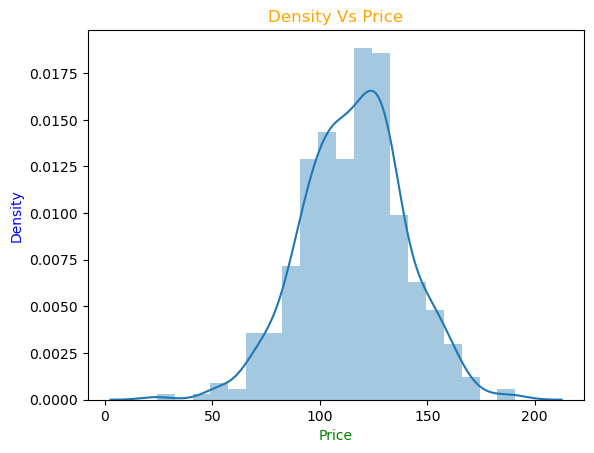

In [12]:
sns.distplot(company_data['Price'])
plt.xlabel('Price',color = 'green')
plt.ylabel('Density',color = 'blue')
plt.title('Density Vs Price', color = 'orange')
plt.show()

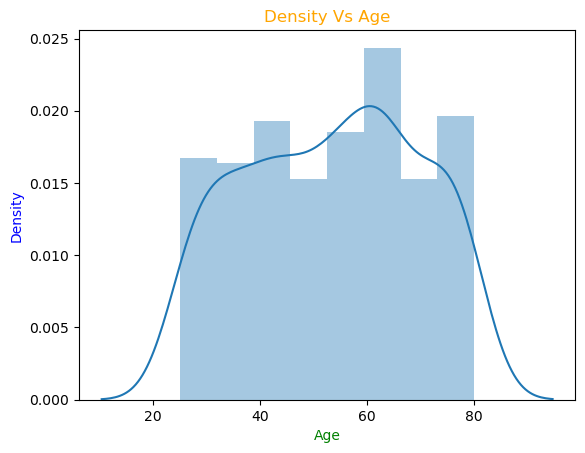

In [13]:
sns.distplot(company_data['Age'])
plt.xlabel('Age',color = 'green')
plt.ylabel('Density',color = 'blue')
plt.title('Density Vs Age', color = 'orange')
plt.show()

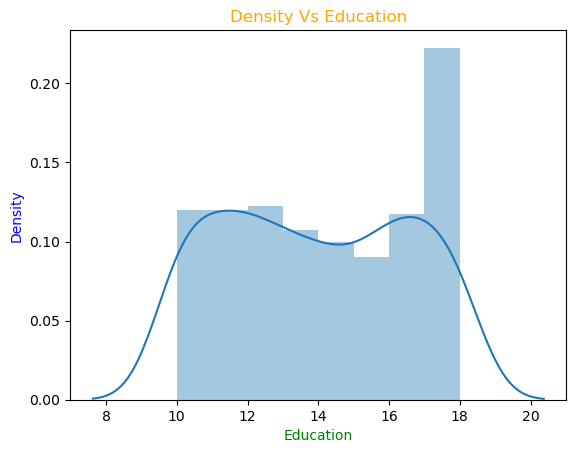

In [14]:
sns.distplot(company_data['Education'])
plt.xlabel('Education',color = 'green')
plt.ylabel('Density',color = 'blue')
plt.title('Density Vs Education', color = 'orange')
plt.show()

In [15]:
company_data['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [16]:
company_data['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [17]:
company_data['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

Using Label Encoder for Categorical Data:-

In [18]:
label_encoder = preprocessing.LabelEncoder()
company_data['ShelveLoc']=label_encoder.fit_transform(company_data['ShelveLoc'])
company_data['Urban']=label_encoder.fit_transform(company_data['Urban'])
company_data['US']=label_encoder.fit_transform(company_data['US'])
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


Separating Independent and Dependent Variables:-

In [19]:
d=company_data.iloc[:,1]
x=company_data.iloc[:,1:]
d

0      138
1      111
2      113
3      117
4      141
      ... 
395    138
396    139
397    162
398    100
399    134
Name: CompPrice, Length: 400, dtype: int64

In [20]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


Bining the Sales Data onto 4 bins:-

In [21]:
y=d.copy()

In [22]:
m=pd.cut(y,bins=4)

In [23]:
m.value_counts()

(101.5, 126.0]     189
(126.0, 150.5]     167
(76.902, 101.5]     26
(150.5, 175.0]      18
Name: CompPrice, dtype: int64

In [24]:
y

0      138
1      111
2      113
3      117
4      141
      ... 
395    138
396    139
397    162
398    100
399    134
Name: CompPrice, Length: 400, dtype: int64

In [25]:
y == m

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Name: CompPrice, Length: 400, dtype: bool

Label Encoder for sales columns:-

In [26]:
y

0      138
1      111
2      113
3      117
4      141
      ... 
395    138
396    139
397    162
398    100
399    134
Name: CompPrice, Length: 400, dtype: int64

In [27]:
LE=preprocessing.LabelEncoder()

In [28]:
y=LE.fit_transform(y)

In [29]:
y

array([49, 22, 24, 28, 52, 35, 26, 47, 43, 43, 32, 28, 33, 26, 18, 60, 29,
       58, 21, 40, 36, 45, 39, 32, 56, 50, 18, 10, 14, 15, 36, 47, 18, 25,
       26, 42, 33, 32, 20, 41, 30, 68,  0, 34,  1, 52, 38, 37, 27, 68, 11,
       32, 64, 20, 45, 54, 44,  5, 14, 29, 33, 16, 50, 30, 12, 33, 38, 37,
       60, 38,  4, 59, 26, 29, 61,  3, 13, 29, 45, 45, 24, 27, 62, 20, 22,
       36, 61, 42, 28, 39, 26,  9, 25, 56, 26, 45, 58, 70, 33, 32, 24, 39,
       24, 34, 32, 15, 13, 45, 18, 26, 39, 43, 27, 42, 33, 50, 46, 56, 23,
       41, 39, 36, 30, 38, 42,  4, 64, 36, 44, 54,  6, 19, 36, 43, 43,  8,
       42, 39, 36, 57, 44, 51, 35, 33, 43, 55, 25, 51, 21, 32, 33, 22, 39,
       61, 40, 10, 57, 32, 53, 30, 22, 54, 33, 41, 59, 58, 30, 17, 40, 15,
       39,  5, 15, 46, 50, 26, 49, 49, 15, 55, 48, 32, 48, 29, 43, 41, 31,
       28, 27, 29, 41, 67, 19, 50, 23, 28, 41, 35, 23, 33, 55, 49, 32, 42,
       66, 24, 71, 22,  2, 10, 36, 28, 56, 60, 26, 27, 52, 17, 49, 27, 42,
       35, 47, 21, 45, 18

In [30]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=40)

In [31]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(320, 10) (80, 10) (320,) (80,)


Building Decision Tree Classifire Using Entropy Criteria:-

In [32]:
model = DecisionTreeClassifier(criterion = "entropy",max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

Graph:-

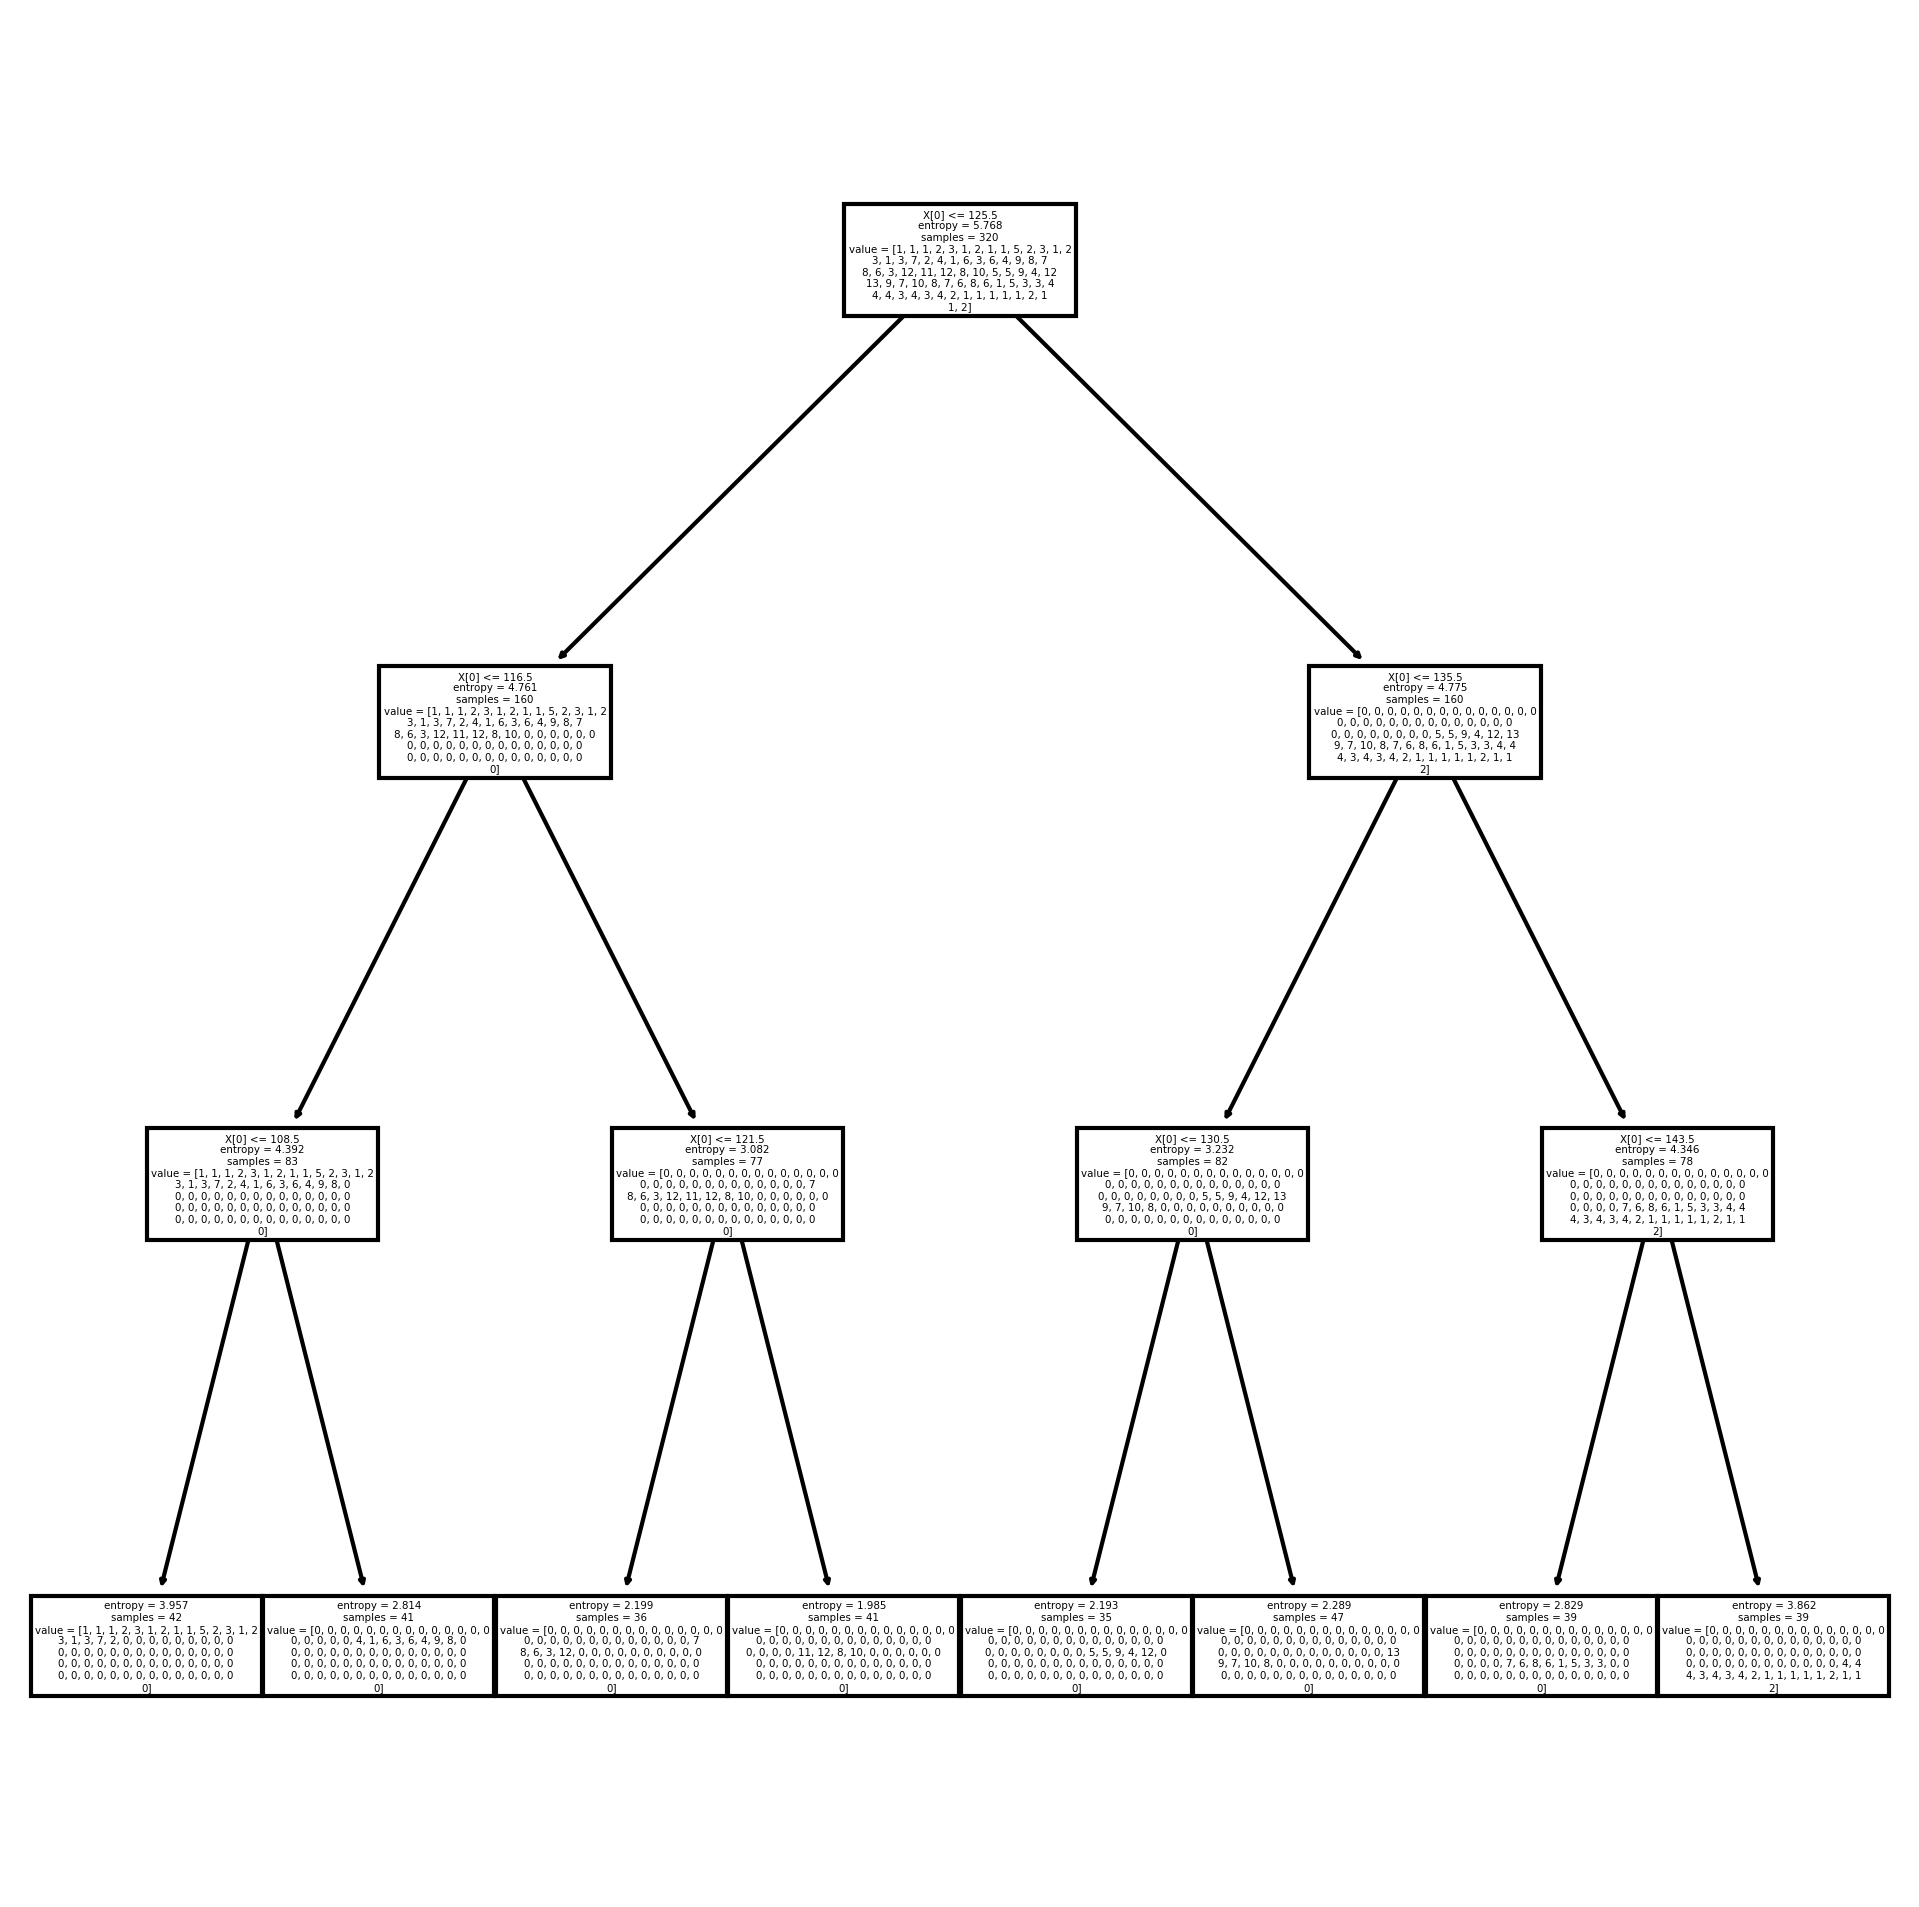

In [33]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(8,8),dpi=300)
tree.plot_tree(model);

This classification depends upon the competitor price

In [34]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [35]:
preds=model.predict(x_test)
pd.Series(preds).value_counts()

26    17
18    16
32    10
49    10
42     9
34     7
55     7
41     4
dtype: int64

In [36]:
pd.crosstab(y_test,preds)

col_0,18,26,32,34,41,42,49,55
row_0,,,,,,,,
0,1,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0
10,1,0,0,0,0,0,0,0
13,1,0,0,0,0,0,0,0
14,2,0,0,0,0,0,0,0
15,2,0,0,0,0,0,0,0
17,2,0,0,0,0,0,0,0
18,2,0,0,0,0,0,0,0
19,4,0,0,0,0,0,0,0


In [37]:
np.mean(preds==y_test)

0.15

Classification is of low accuracy

Trying 6 bins:-

In [38]:
y=d.copy()

In [39]:
m=pd.cut(y,bins=6)

In [40]:
y=m

In [41]:
le=preprocessing.LabelEncoder()

In [42]:
y=le.fit_transform(y)

In [43]:
y

array([3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 2, 2, 2, 2, 1, 4, 2, 4, 2, 3, 2, 3,
       3, 2, 4, 3, 1, 1, 1, 1, 2, 3, 1, 2, 2, 3, 2, 2, 1, 3, 2, 4, 0, 2,
       0, 3, 3, 2, 2, 4, 1, 2, 4, 1, 3, 4, 3, 0, 1, 2, 2, 1, 3, 2, 1, 2,
       3, 2, 4, 3, 0, 4, 2, 2, 4, 0, 1, 2, 3, 3, 2, 2, 4, 1, 2, 2, 4, 3,
       2, 3, 2, 1, 2, 4, 2, 3, 4, 5, 2, 2, 2, 3, 2, 2, 2, 1, 1, 3, 1, 2,
       3, 3, 2, 3, 2, 3, 3, 4, 2, 3, 3, 2, 2, 3, 3, 0, 4, 2, 3, 4, 1, 1,
       2, 3, 3, 1, 3, 3, 2, 4, 3, 3, 2, 2, 3, 4, 2, 3, 2, 2, 2, 2, 3, 4,
       3, 1, 4, 2, 3, 2, 2, 4, 2, 3, 4, 4, 2, 1, 3, 1, 3, 0, 1, 3, 3, 2,
       3, 3, 1, 4, 3, 2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 4, 1, 3, 2, 2, 3, 2,
       2, 2, 4, 3, 2, 3, 4, 2, 5, 2, 0, 1, 2, 2, 4, 4, 2, 2, 3, 1, 3, 2,
       3, 2, 3, 2, 3, 1, 2, 2, 4, 1, 2, 3, 3, 2, 2, 2, 3, 4, 2, 2, 5, 3,
       2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 2, 1, 2, 4, 2, 1, 2, 3, 2, 2, 2,
       3, 3, 3, 3, 2, 5, 2, 2, 2, 2, 3, 1, 3, 3, 2, 3, 2, 2, 4, 3, 1, 4,
       2, 1, 2, 4, 1, 2, 2, 2, 4, 2, 3, 2, 4, 3, 2,

In [44]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=40)

In [45]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(320, 10) (80, 10) (320,) (80,)


In [46]:
model = DecisionTreeClassifier(criterion = "entropy",max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

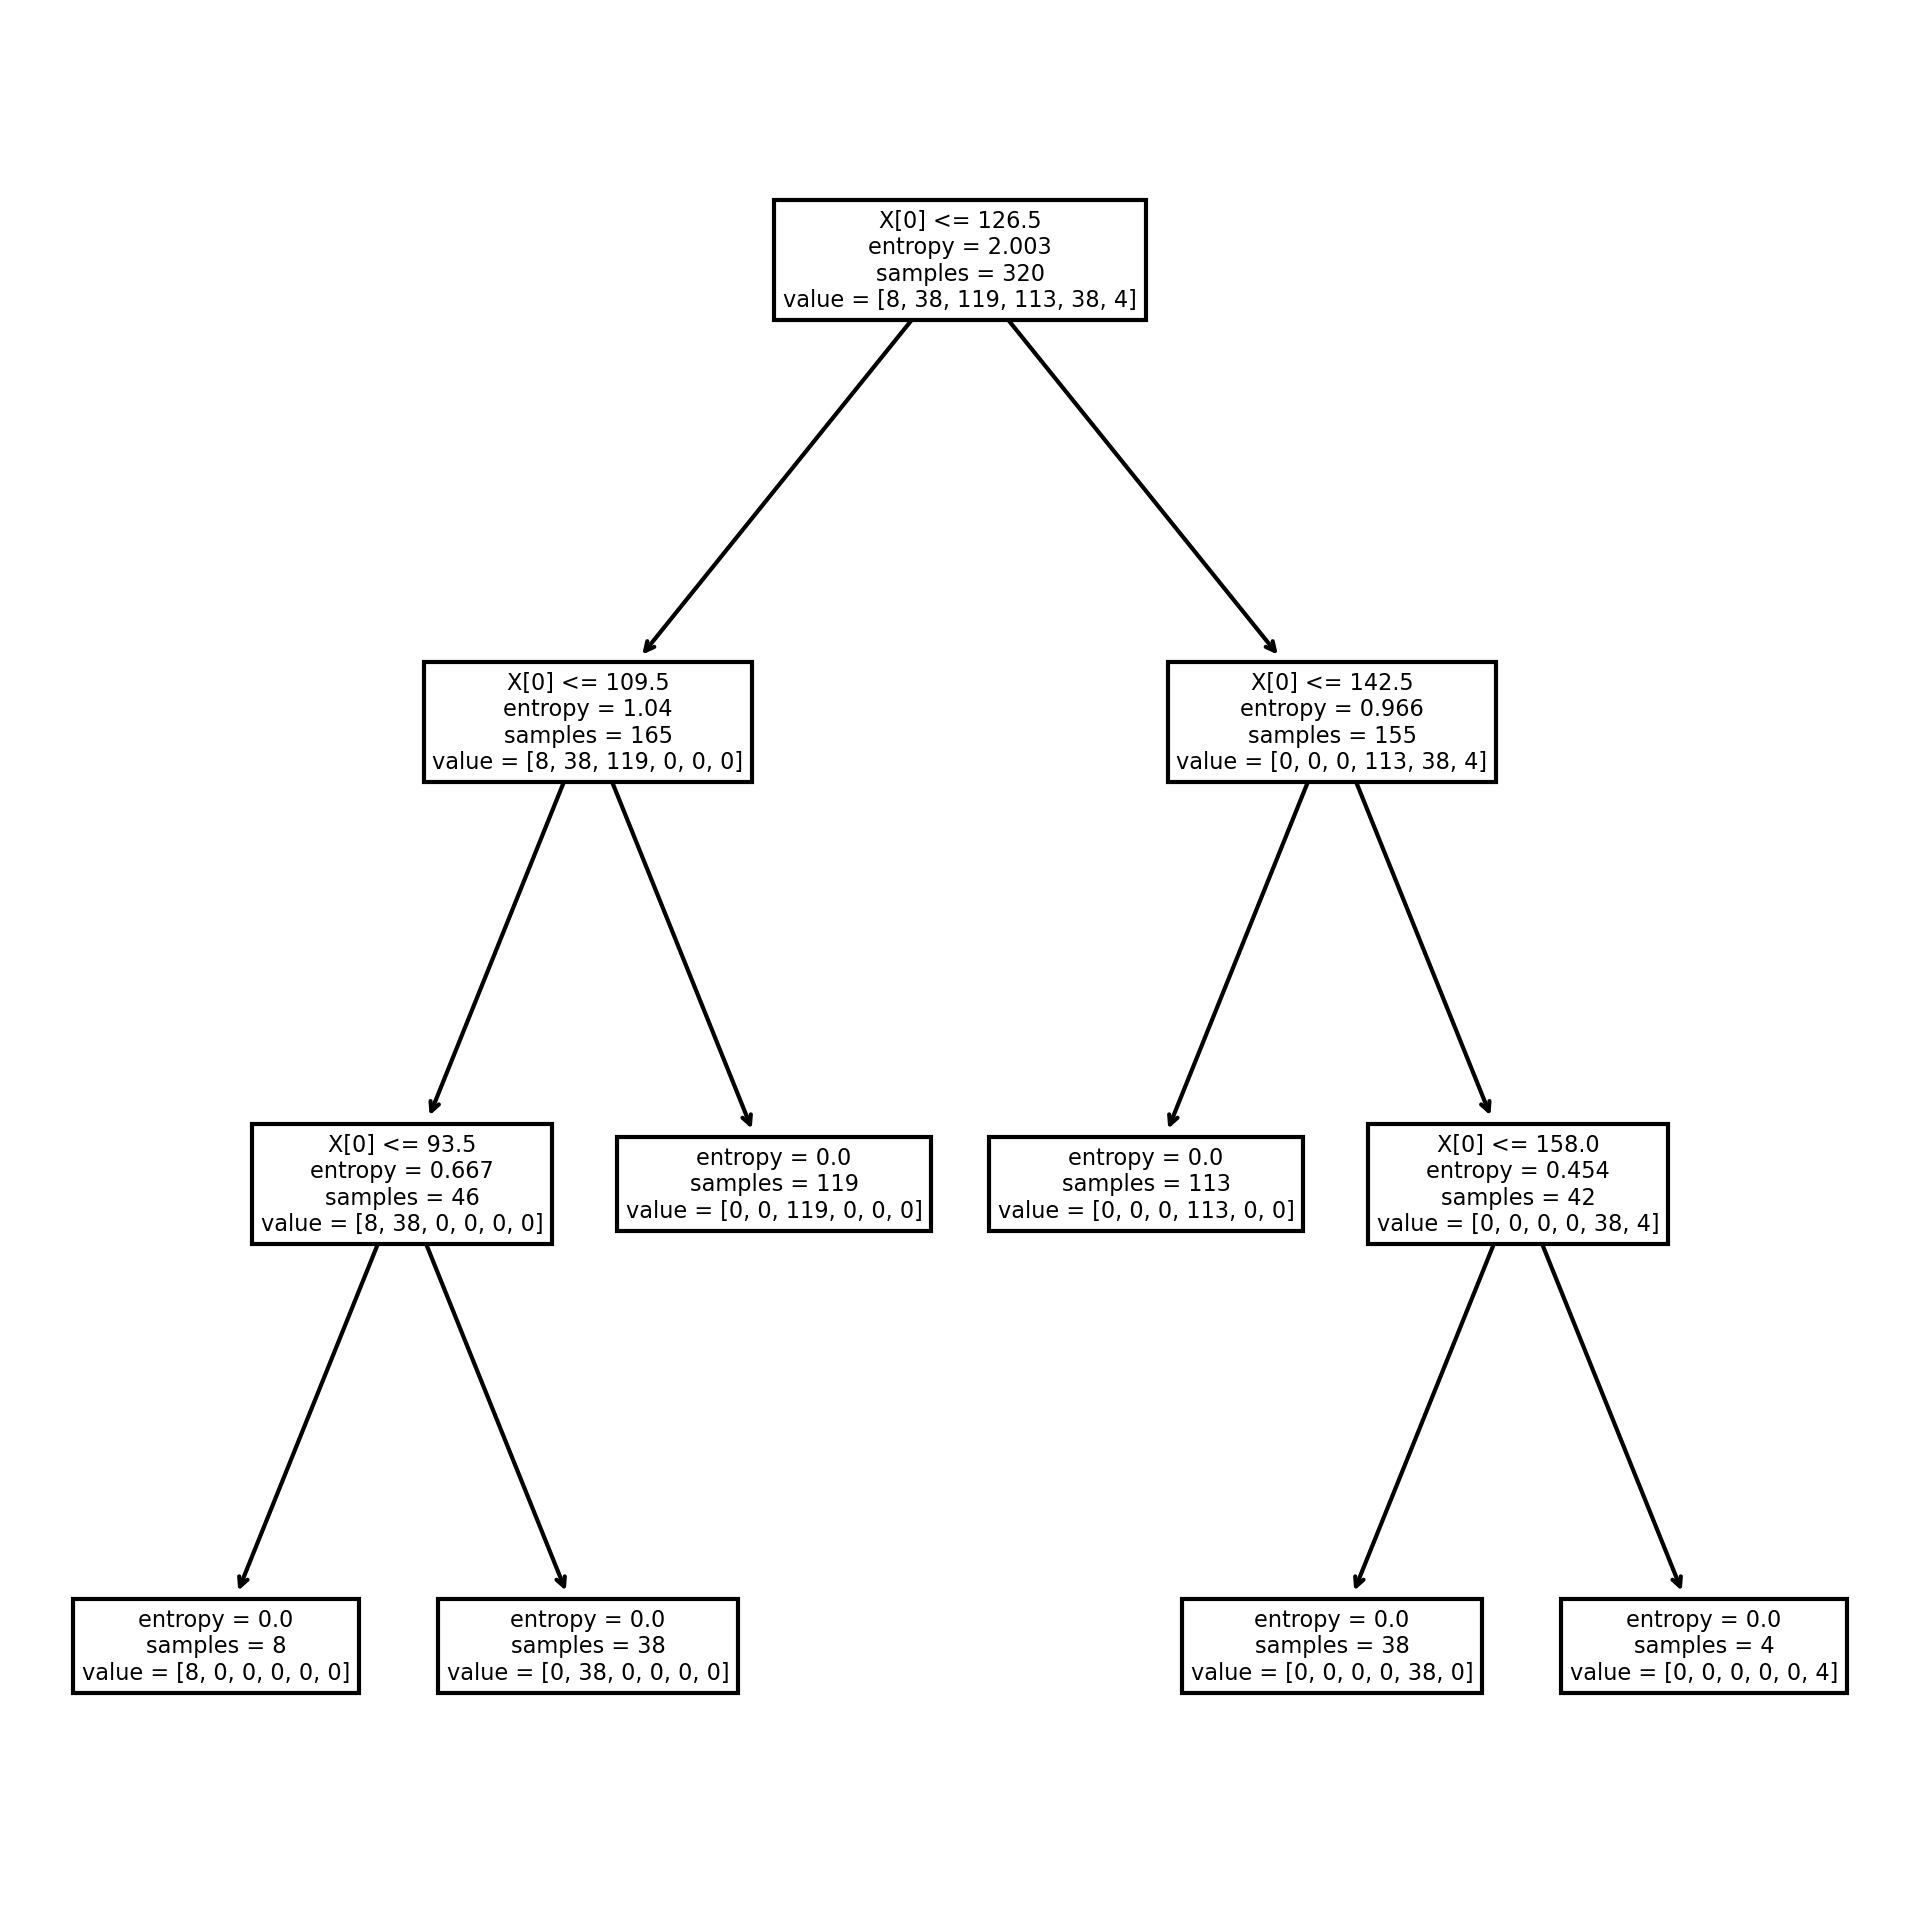

In [47]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(8,8),dpi=300)
tree.plot_tree(model);

In [48]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

2    33
3    22
1    16
4     6
5     2
0     1
dtype: int64

In [49]:
pd.crosstab(y_test,preds)

col_0,0,1,2,3,4,5
row_0,,,,,,
0,1,0,0,0,0,0
1,0,16,0,0,0,0
2,0,0,33,0,0,0
3,0,0,0,22,0,0
4,0,0,0,0,6,0
5,0,0,0,0,0,2


In [50]:
np.mean(preds==y_test)

1.0

Classification is of higher accuracy.